## Markowitz Portolio Optimization
- Returns of a portfolio can be increased without increasing risk of the portfolio by making a portfolio of relatively unrelated(low correlation) stocks
- Expected returns of a portfolio = sum of (weight of the stock X(say) * returns of the stock X)
- Expected std of a portfolio of two stocks = (weight1 * std1 + weight * std2) ^ 2

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import yfinance as yfin
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for ticker in assets:
    data = yfin.Ticker(ticker)
    df = data.history(start='2010-1-1')
    df["Date"] = df.index.date
    df.set_index(["Date"], inplace=True)
    pf_data[ticker] = df["Close"]

In [4]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,40.925011,1132.989990
2010-01-05,40.938412,1136.520020
2010-01-06,40.744221,1137.140015
2010-01-07,40.523258,1141.689941
2010-01-08,40.469685,1144.979980


In [5]:
# pf_data.loc["2023-01-06"]
pf_data.tail()

,PG,^GSPC
Date,,
2023-05-26,145.399994,4205.450195
2023-05-30,143.179993,4205.520020
2023-05-31,142.500000,4179.830078
2023-06-01,143.960007,4221.020020
2023-06-02,146.520004,4282.370117


In [6]:
pf_data.shape, pf_data.size

((3377, 2), 6754)

For comparision normalizing to 100

<AxesSubplot:xlabel='Date'>

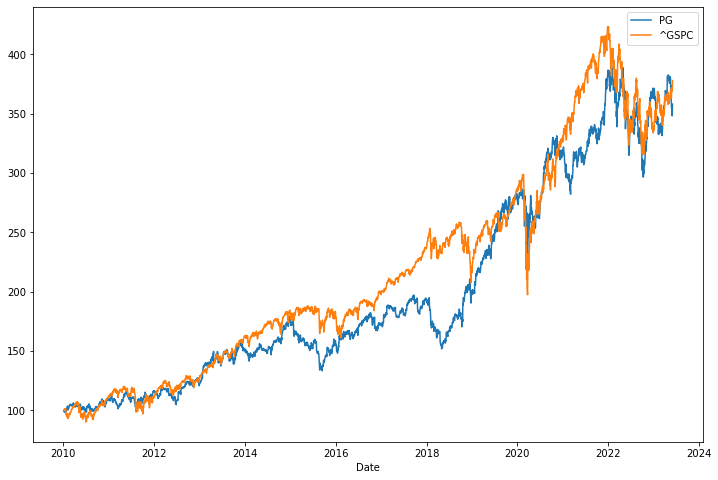

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(12, 8))

obtaining efficient frontier  

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean()*250

PG       0.094448
^GSPC    0.098463
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029812,0.017399
^GSPC,0.017399,0.031388


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.568788
^GSPC,0.568788,1.000000


Number of stocks in the portfolio

In [12]:
 num_assets = len(assets)

In [13]:
num_assets

2

Random weights of the assets in the potfolio

In [14]:
arr = np.random.random(num_assets)
arr

array([0.32586496, 0.56683862])

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.31874704, 0.68125296])

In [16]:
weights[0] + weights[1]

1.0

Expected Portfolio returns

In [17]:
np.sum(log_returns.mean() * weights) * 250

0.09718321477963057

Expected portfolio Variance

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.025152665675274233

Expected portfolio volatility

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)) ** 0.5

0.15859591947863674

Random weights selection check

In [20]:
port_returns = []
port_volatilities = []

for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.sum(weights * log_returns.mean()) * 250)
    port_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

port_returns = np.array(port_returns)
port_volatilities = np.array(port_volatilities)

port_returns, port_volatilities

(array([0.0962513 , 0.09822412, 0.09604296, 0.09754761, 0.09537037,
        0.09647934, 0.09662112, 0.09731493, 0.0970605 , 0.0970029 ,
        0.09754943, 0.09595289, 0.09603396, 0.09665836, 0.09572527,
        0.09750205, 0.09751887, 0.0970188 , 0.09487041, 0.09750687,
        0.09656458, 0.09493531, 0.09764429, 0.0956874 , 0.09613137,
        0.09733299, 0.09775066, 0.09519316, 0.09675738, 0.09557786,
        0.09561554, 0.09648685, 0.09456382, 0.09730277, 0.09636955,
        0.09650744, 0.09574243, 0.0975379 , 0.09583919, 0.09576875,
        0.09628455, 0.09640279, 0.09605785, 0.09814874, 0.09652307,
        0.09533644, 0.09558144, 0.0967072 , 0.09446842, 0.09594975,
        0.09470164, 0.09553035, 0.09799703, 0.09776346, 0.09663096,
        0.09833786, 0.09704908, 0.09643371, 0.09664341, 0.09577288,
        0.09515532, 0.09595754, 0.09833155, 0.09602107, 0.09452157,
        0.09710463, 0.09617742, 0.09812031, 0.09633519, 0.09717123,
        0.09525962, 0.0958498 , 0.09627982, 0.09

In [21]:
portfolios = pd.DataFrame({"Returns":port_returns, "Volatilites" : port_volatilities})
portfolios.head()

,Returns,Volatilites
0,0.096251,0.154879
1,0.098224,0.172674
2,0.096043,0.155294
3,0.097548,0.162424
4,0.095370,0.159691


In [22]:
portfolios.tail()

,Returns,Volatilites
995,0.097194,0.158688
996,0.096802,0.155990
997,0.094485,0.172002
998,0.096464,0.154930
999,0.097155,0.158356


Text(0, 0.5, 'Expected Returns')

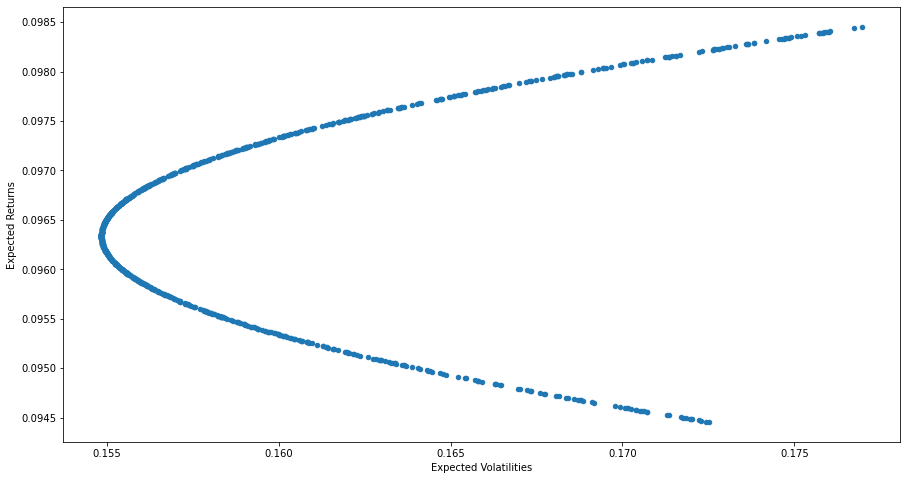

In [23]:
portfolios.plot(x="Volatilites", y="Returns", kind="scatter", figsize=(15, 8))
plt.xlabel("Expected Volatilities")
plt.ylabel("Expected Returns")